<div style="display: flex; align-items: center;">
    <img src="../img/es_logo.png" alt="title" style="margin-right: 20px;">
    <h1>Introduction to Python</h1>
</div>

### Submission Instructions

- Complete the excercises in the notebook below.
- Once you have completed the notebook, you should submit the completed notebook and any additional files you created for the assignment by uploading them to your github profile and sharing the github link as the submission.
- your github repostory should contain the required files as well as a README.md file that summarizes what you have learned in this module.

### Recommended Readings:
- W3Schools Python: [Classes and Objects](https://www.w3schools.com/python/python_classes.asp)
- Real Python: [Object-Oriented Programming (OOP) in Python 3](https://realpython.com/python3-object-oriented-programming/)
- Python Docs: [Classes](https://docs.python.org/3/tutorial/classes.html)
- Geeks for Geeks: [Python Classes and Objects](https://www.geeksforgeeks.org/python-classes-and-objects/)

#### Exercise 1
create a class called `Point` that takes two parameters `x` and `y` and stores them as attributes. Then create a method called `distance` that takes another `Point` object and calculates the distance between the two points.

Create an appropriate `__str__` method for the class.

In [19]:
import math
class Point:
    
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2
    
    def distance(self):
        x1, y1 = self.point1
        x2, y2 = self.point2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    def __str__(self):
         return f"This is for calculation the distance between {self.point1} and {self.point2}"
    
    
point1 = (1, 2)
point2 = (4, 6)    
obj= Point(point1,point2)
print(obj)  
print(f"Length of the line: {obj.distance()}") 


This is for calculation the distance between (1, 2) and (4, 6)
Length of the line: 5.0


#### Exercise 2
- create a class called `Line` that takes two parameters `point1` and `point2` and stores them as attributes. Then create a method called `length` that calculates the length of the line.
- the `Line` class should also have a method called `slope` that calculates the slope of the line.
- create a method called `point_on_line` that takes a `Point` object and returns `True` if the point is on the line and `False` otherwise.

Create an appropriate `__str__` method for the class.

In [20]:
import math

class Line:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2
    
    def length(self):
        x1, y1 = self.point1
        x2, y2 = self.point2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    def slope(self):
        x1, y1 = self.point1
        x2, y2 = self.point2
        if x2 == x1:
            raise ValueError("Slope is undefined for a vertical line.")
        return (y2 - y1) / (x2 - x1)
    
    def point_on_line(self, point):
        x1, y1 = self.point1
        x2, y2 = self.point2
        x, y = point
        if x2 == x1:
            return x == x1
        slope = self.slope()
        intercept = y1 - slope * x1
        return y == slope * x + intercept
    
    def __str__(self):
        return f"Line from {self.point1} to {self.point2}"


point1 = (1, 2)
point2 = (4, 6)
line = Line(point1, point2)

print(line)  
print(f"Length of the line: {line.length()}")  # Length of the line: 5.0
print(f"Slope of the line: {line.slope()}")  # Slope of the line: 1.3333333333333333
print(f"Is point (2, 3) on the line? {line.point_on_line((2, 3))}")  # False
print(f"Is point (2, 4) on the line? {line.point_on_line((2, 4))}")  # True     

Line from (1, 2) to (4, 6)
Length of the line: 5.0
Slope of the line: 1.3333333333333333
Is point (2, 3) on the line? False
Is point (2, 4) on the line? False


#### Exercise 3
- create a class called `Shape` that takes a list of `Lines` and stores them as an attribute. Then create a method called `perimeter` that calculates the perimeter of the shape.
- the `Shape` class should have a method called `draw` that draws the shape using `matplotlib`. use the function `draw_lines` below to draw the lines.
- create a method called `point_on_perimeter` that takes a `Point` object and returns `True` if the point is on the perimeter of the shape and `False` otherwise.

Create an appropriate `__str__` method for the class.

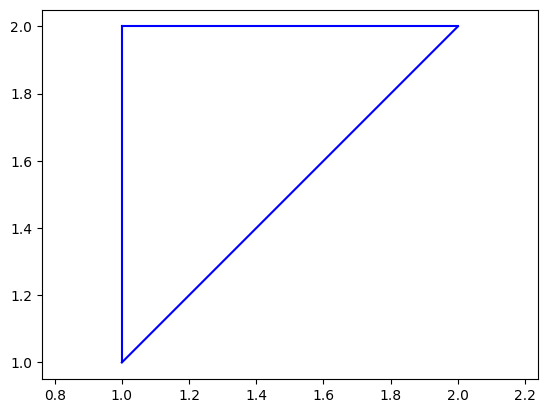

In [14]:
import matplotlib.pyplot as plt
import math
def draw_lines(lines, color):
    for line in lines:
        plt.plot([line.start.x, line.end.x], [line.start.y, line.end.y], color)
        
    plt.axis('equal')
    plt.show()

lines =[Line(Point(1,1), Point(1,2)), Line(Point(1,2), Point(2,2)), Line(Point(2,2), Point(1,1))]
color = "blue"
draw_lines(lines,color)

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"Point({self.x}, {self.y})"
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

class Line:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    
    def length(self):
        return ((self.end.x - self.start.x)**2 + (self.end.y - self.start.y)**2) ** 0.5
    
    def __str__(self):
        return f"Line({self.start}, {self.end})" 
    


In [15]:
import matplotlib.pyplot as plt
class Shape:
    def __init__(self, lines):
        self.lines = lines
    
    def perimeter(self):
        return sum(line.length() for line in self.lines)
    
    def draw(self):
        for line in self.lines:
            plt.plot([line.start.x, line.end.x], [line.start.y, line.end.y], 'b-')
        plt.axis('equal')
        plt.show()
    
    def point_on_perimeter(self, point):
        for line in self.lines:
            if self._point_on_line(point, line):
                return True
        return False
    
    def _point_on_line(self, point, line):
        # Check if the point is on the line segment
        crossproduct = (point.y - line.start.y) * (line.end.x - line.start.x) - (point.x - line.start.x) * (line.end.y - line.start.y)
        if abs(crossproduct) > 1e-6:
            return False
        dotproduct = (point.x - line.start.x) * (line.end.x - line.start.x) + (point.y - line.start.y) * (line.end.y - line.start.y)
        if dotproduct < 0:
            return False
        squaredlengthba = (line.end.x - line.start.x) * (line.end.x - line.start.x) + (line.end.y - line.start.y) * (line.end.y - line.start.y)
        if dotproduct > squaredlengthba:
            return False
        return True

    def __str__(self):
        return f"Shape with lines: {[str(line) for line in self.lines]}" 

create the following classes:
- `Rectangle` that inherits from `Shape` and takes three parameters `width` and `height` and a Point object `center`. The lines of the rectangle should be calculated using the `width`, `height` and `center` parameters. Then create a method called `area` that calculates the area of the rectangle.
- `Square` that inherits from `Rectangle` and takes two parameter `side` and `center` and stores it as an attribute.
- `Circle` that inherits from `Shape` and takes 3 parameters `radius` and `center` and an optional `num_sides` with a default value of 20. The lines of the circle should be calculated using the `radius`, `center` and `num_sides` parameters. Then create a method called `area` that calculates the area of the circle.
- for the `Circle` class, override the `perimeter` and `point_on_perimeter` methods to work with circles (it should find if point on perimeter in the logical sense rather than the visual representatiobn that uses lines).

Create an appropriate `__str__` method for each one of the classes.

In [16]:
class Rectangle(Shape):
    def __init__(self, width, height, center):
        self.width = width
        self.height = height
        self.center = center
        lines = self._calculate_lines()
        super().__init__(lines)
    
    def _calculate_lines(self):
        half_width = self.width / 2
        half_height = self.height / 2
        top_left = Point(self.center.x - half_width, self.center.y + half_height)
        top_right = Point(self.center.x + half_width, self.center.y + half_height)
        bottom_left = Point(self.center.x - half_width, self.center.y - half_height)
        bottom_right = Point(self.center.x + half_width, self.center.y - half_height)
        return [
            Line(top_left, top_right),
            Line(top_right, bottom_right),
            Line(bottom_right, bottom_left),
            Line(bottom_left, top_left)
        ]
    
    def area(self):
        return self.width * self.height
    
    def __str__(self):
        return f"Rectangle(width={self.width}, height={self.height}, center={self.center})"

class Square(Rectangle):
    def __init__(self, side, center):
        super().__init__(side, side, center)
    
    def __str__(self):
        return f"Square(side={self.width}, center={self.center})"

import math

class Circle(Shape):
    def __init__(self, radius, center, num_sides=20):
        self.radius = radius
        self.center = center
        self.num_sides = num_sides
        lines = self._calculate_lines()
        super().__init__(lines)
    
    def _calculate_lines(self):
        points = []
        for i in range(self.num_sides):
            angle = 2 * math.pi * i / self.num_sides
            x = self.center.x + self.radius * math.cos(angle)
            y = self.center.y + self.radius * math.sin(angle)
            points.append(Point(x, y))
        lines = []
        for i in range(len(points)):
            lines.append(Line(points[i], points[(i + 1) % len(points)]))
        return lines
    
    def area(self):
        return math.pi * self.radius * self.radius
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
    def point_on_perimeter(self, point):
        distance = ((point.x - self.center.x)**2 + (point.y - self.center.y)**2) ** 0.5
        return abs(distance - self.radius) < 1e-6
    
    def __str__(self):
        return f"Circle(radius={self.radius}, center={self.center}, num_sides={self.num_sides})"

#### Exercise 4
Create a program that simulates a simple employee management system. The program should allow the user to perform the following tasks:
- add a new employee either a Manager or a Developer to the company.
- display the list of employees in the company, along with their details.
- calculate the total salary of all employees in the company.

Create the following classes:
- `Employee` class that takes three parameters `name`, `age` and `salary` and stores them as attributes. 
- `Manager` class that inherits from `Employee` and takes an additional parameter `department` and stores it as an attribute.
- `Developer` class that inherits from `Employee` and takes an additional parameter `programming_language` and stores it as an attribute.

Create a class called `Company` with the following methods:
- `add_employee` that takes an `Employee` object and adds it to the list of employees.
- `display_employees` that displays the list of employees in the company.
- `calculate_total_salary` that calculates the total salary of all employees in the company.

Use user input to allow the user to perform the above tasks.

##### Example Output
```console
Welcome to Estarta Solutions Employee Management System

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 1

Enter employee type (Manager/Developer): Manager
Enter employee name: Ali
Enter employee age: 35
Enter employee salary: 5000
Enter employee department: IT

Employee added successfully!

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 1

Enter employee type (Manager/Developer): Developer
Enter employee name: Sara
Enter employee age: 28
Enter employee salary: 4000
Enter employee programming language: Python

Employee added successfully!

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 2

Ali, a 35 year old Manager in the IT department with a salary of 5000
Sara, a 28 year old Developer in Python with a salary of 4000

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 3

Total salary of all employees is 9000

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 4

Thank you for using Estarta Solutions Employee Management System.
Goodbye!
```